# Notebook for comparison beween  Gevolution and class and agreement between class and hi-class

In [1]:
import numpy as np
import matplotlib.pylab as plt
from scipy.interpolate import interp1d
from pylab import rcParams
import scipy.integrate as integrate
from scipy.stats import kde

# ColorsI = ["red","blue","green","purple","darkcyan","gold","maroon","black","darkslategrey",
#            "darkgreen","navy","indigo","magenta","salmon","dodgerblue","springgreen","plum",
#            "cyan","khaki","lightcoral","gray"]
ColorsII = []
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.cm as cm
from matplotlib.colors import LogNorm
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
# plt.style.use('seaborn-paper')
plt.rcParams['font.serif'] = 'Ubuntu'
ColorsI = ["red","blue","green","purple",'C1','navy','darkred']
# ColorsII = ['darkred','purple','green','blue']

In [4]:
addressGev_LargeBox="./CSCS_Runs/New_BackReaction_Precise_14July2019/BackReaction_TEST/kev_cs2_e7_9000///output/";
addressGev_Midrange="./CSCS_Runs/Full_simulations_20March2019-1280Mpc/1280-cs_e7-w09-Kevolution///output/";

zlist=np.array([100.0,50.0,20.0,10.0 ,6.0,5.0,4.0,3.0,2.0,1.0,0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1,0.09,0.08,0.07,0.06,0.05,0.04,0.03,0.02,0.01,0.005,0.001,0.0,])
zrange=np.shape(zlist)[0]
Gev_lin_chi = []
Gev_lin_phi_zall=[]
Gev_cross_zall=[]
# Gev_lin_phi_prime_zall
for i in range(zrange):
    Gev_lin_phi_zall.append(np.loadtxt(addressGev_LargeBox+"//kess_pk_cs_e2_w09_large"+str(i).zfill(3)+"_phi.dat") )
    Gev_lin_chi.append(np.loadtxt("./"+addressGev_LargeBox+"//kess_pk_cs_e2_w09_large"+str(i).zfill(3)+"_chi.dat") )
for i in range(zrange):
    Gev_lin_phi_zall.append(np.loadtxt("./"+addressGev_Midrange+"/kess_pk_cs_e7_w09_mid"+str(i).zfill(3)+"_phi.dat") )
    Gev_lin_chi.append(np.loadtxt("./"+addressGev_Midrange+"/kess_pk_cs_e7_w09_mid"+str(i).zfill(3)+"_chi.dat") )

# for i in range(zrange):
#     Gev_lin_phi_zall.append(np.loadtxt("./"+addressGev_Smallrange+"/kess_pk_cs_e7w09_small_"+str(i).zfill(3)+"_phi.dat") )
#     Gev_lin_chi.append(np.loadtxt("./"+addressGev_Smallrange+"/kess_pk_cs_e7w09_small_"+str(i).zfill(3)+"_chi.dat") )

# addressGev_LargeBox="Runs-25April2019/9000-cs_e4-w09-Kevolution//output/";
# addressGev_Midrange="Runs-25April2019/1280-cs_e4-w09-Kevolution////output/";
# # # addressGev_Smallrange="./CSCS_Results/Full_Simulations/300Boxsize-cs_e4-w09-Kevolution////output/";

# # zlist=np.array([100.0,50.0,20.0,10.0 ,6.0,5.0,4.0,3.0,2.0,1.0,0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1,0.09,0.08,0.07,0.06,0.05,0.04,0.03,0.02,0.01,0.005,0.001,0.0,])
# # zrange=np.shape(zlist)[0]

# Gev_lin_chi_cs4=[]
# Gev_lin_phi_zall_cs4=[]
# # Gev_lin_phi_prime_zall
# for i in range(zrange):
#     Gev_lin_phi_zall_cs4.append(np.loadtxt("./"+addressGev_LargeBox+"/kess_pk_cs_e2_w09_large"+str(i).zfill(3)+"_phi.dat") )
#     Gev_lin_chi_cs4.append(np.loadtxt("./"+addressGev_LargeBox+"/kess_pk_cs_e2_w09_large"+str(i).zfill(3)+"_chi.dat") )

# for i in range(zrange):
#     Gev_lin_phi_zall_cs4.append(np.loadtxt("./"+addressGev_Midrange+"/kess_pk_cs_e2_w09_mid"+str(i).zfill(3)+"_phi.dat") )
#     Gev_lin_chi_cs4.append(np.loadtxt("./"+addressGev_Midrange+"/kess_pk_cs_e2_w09_mid"+str(i).zfill(3)+"_chi.dat") )

# for i in range(zrange):
#     Gev_lin_chi_cs4.append(np.loadtxt("./"+addressGev_Smallrange+"/kess_pk_cs_e4_w09_small_"+str(i).zfill(3)+"_phi.dat") )
#     Gev_lin_phi_zall_cs4.append(np.loadtxt("./"+addressGev_Smallrange+"/kess_pk_cs_e4_w09_small_"+str(i).zfill(3)+"_chi.dat") )
Class_all=[]
Class_phi_prime=[]
# Class_pk_all=[]
# zlist_class=[ 100 , 50, 20, 10 , 6 , 5 , 4, 3, 2 , 1 , 0]
# zlist_class=zlist
zlist_class=np.array([100.0,50.0,20.0,10.0 ,6.0,5.0,4.0,3.0,2.0,1.0,0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1,0.09,0.08,0.07,0.06,0.05,0.04,0.03,0.02,0.01,0.005,0.001,0.0,])

# zlist_phiprime=[ 100 , 50, 20, 10 , 6 , 5 , 4, 3, 2 , 1 , 0]
class_high="./Class_Gev_IC/class_cs2_07_w09/Output/";

for i in range(np.shape(zlist_class)[0]):
    Class_all.append(np.loadtxt(class_high+"/class_kess_cs_e7_w_09_newt_z"+str(i+1)+"_tk.dat"))
    #     Class_pk_all.append(np.loadtxt(class_high+"/class_kess_cs_e3_newt_z"+str(i+1)+"_pk.dat"))
# for i in range(np.shape(zlist_phiprime)[0]):    
#     Class_phi_prime.append(np.loadtxt(class_high+"/Class_cs_e3_w0.9/Kessence_field_class_phi_prime_z"+str(zlist_phiprime[i])+".dat"))
maxNum=np.shape(zlist_class)[0]


# Background test

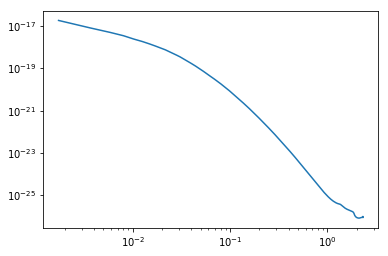

In [6]:
for i in range(3,4):
    plt.loglog(Gev_lin_chi[i][:,0],Gev_lin_chi[i][:,1])
#     plt.loglog(Gev_lin_chi_cs4[i][:,0],Gev_lin_chi_cs4[i][:,1])
plt.show()

In [22]:
class_zall_interp_deltam_Hubble=[]
class_zall_interp_deltam_LargeBox=[]
class_zall_interp_deltam_Mid=[]

class_zall_interp_deltakess_Hubble=[]
class_zall_interp_deltakess_LargeBox=[]
class_zall_interp_deltakess_Mid=[]

class_zall_interp_phi_Hubble=[]
class_zall_interp_phi_LargeBox=[]
class_zall_interp_phi_Mid=[]

class_zall_interp_phi_prime_Hubble=[]
class_zall_interp_phi_prime_LargeBox=[]
class_zall_interp_phi_prime_Mid=[]
class_zall_interp_phi=[]
class_zall_interp_psi=[]
for i in range(0,zrange):
#     interp_class_deltam=(interp1d(Class_all[i][:,0],Class_all[i][:,7]) )
#     interp_class_deltam_Large=(interp1d(Class_all[i][:,0],Class_all[i][:,7]) )
#     interp_class_deltam_Mid=(interp1d(Class_all[i][:,0],Class_all[i][:,7]) )

#     interp_class_deltakess=(interp1d(Class_all[i][:,0],Class_all[i][:,3]) )
#     interp_class_deltakess_Large=(interp1d(Class_all[i][:,0],Class_all[i][:,3]) )
#     interp_class_deltakess_Mid=(interp1d(Class_all[i][:,0],Class_all[i][:,3]) )

    interp_class_phi=(interp1d(Class_all[i][:,0],Class_all[i][:,7]) )
#     interp_class_phi=(interp1d(Class_all[i][:,0],Class_all[i][:,5]) )
#     interp_class_psi_large=(interp1d(Class_all[i][:,0],Class_all[i][:,5]) )
    interp_class_psi=(interp1d(Class_all[i][:,0],Class_all[i][:,8]) )

#     interp_class_phi_prime=(interp1d(Class_phi_prime[i][:,0],Class_phi_prime[i][:,1]) )

    class_zall_interp_phi.append(interp_class_phi(Gev_lin_phi_zall[i][:,0]))
    class_zall_interp_psi.append(interp_class_psi(Gev_lin_phi_zall[i][:,0]))
#     class_zall_interp_deltam_Mid.append(interp_class_deltam(Gev_lin_delta_m_zall[i+22][:,0]) )

#     class_zall_interp_deltakess_Hubble.append(interp_class_deltakess(Gev_lin_deltakess_z_all[i][:,0]) )
#     class_zall_interp_deltakess_LargeBox.append(interp_class_deltakess(Gev_lin_deltakess_z_all[i+zrange][:,0]) )
#     class_zall_interp_deltakess_Mid.append(interp_class_deltakess(Gev_lin_deltakess_z_all[i+22][:,0]) )

#     class_zall_interp_phi_Hubble.append(interp_class_phi(Gev_lin_phi_zall[i][:,0]) )
#     class_zall_interp_phi_LargeBox.append(interp_class_phi(Gev_lin_phi_zall[i+zrange][:,0]) )
#     class_zall_interp_phi_Mid.append(interp_class_phi(Gev_lin_phi_zall[i+22][:zrange,0]) )

#     class_zall_interp_phi_prime_Hubble.append(interp_class_phi_prime(Gev_lin_phi_prime_zall[i][:,0]) )
#     class_zall_interp_phi_prime_LargeBox.append(interp_class_phi_prime(Gev_lin_phi_prime_zall[i+11][:,0]) )
#     class_zall_interp_phi_prime_Mid.append(interp_class_phi_prime(Gev_lin_phi_prime_zall[i+22][:,0]) )

# eta function

In [8]:
# def= phi -chi
psi_all_cs7 = []
eta_CLASS= []
for i in range(zrange)  :  
#     Class_all[i][:,7] phi
#     Class_all[i][:,8] psi
#     psi_all_cs7.append(psi_k_cs7);
    eta_CLASS.append( Class_all[i][:,7]/Class_all[i][:,8])

In [26]:
# # def= phi -chi
# psi_all_cs4 = []
# eta_cs4= []
# for i in range(zrange*2):  
#     phi_k_cs4 = -np.sqrt(Gev_lin_phi_zall_cs4[i])
#     psi_k_cs4 = phi_k_cs4 - np.sqrt(Gev_lin_chi_cs4[i])
#     psi_all_cs4.append(psi_k_cs4);
#     eta_cs4.append( phi_k_cs4/psi_k_cs4)

In [14]:
# def= phi -chi
psi_all_cs7 = []
eta_cs7= []
for i in range(zrange*2):  
    phi_k_cs7 = -np.sqrt(Gev_lin_phi_zall[i])
    psi_k_cs7 = phi_k_cs7 - np.sqrt(Gev_lin_chi[i])
    psi_all_cs7.append(psi_k_cs7);
    eta_cs7.append( phi_k_cs7/psi_k_cs7)

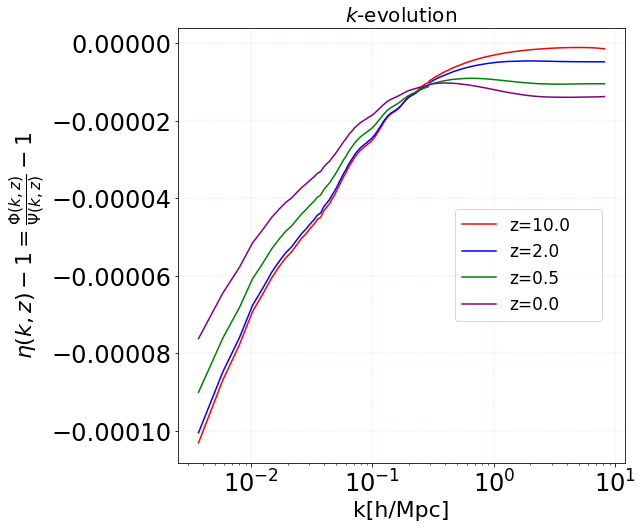

In [101]:

fig, axs = plt.subplots(1,1,figsize=(8,8), sharex=True)
plt.subplots_adjust(hspace=0)
# axs[0] = plt.gca()
k_min=4
axs.tick_params(axis = 'both', which = 'major', labelsize = 24)
axs.tick_params(axis = 'both', which = 'minor', labelsize = 18)
# axins = zoomed_inset_axes(axs[0], 18.0,loc=4,borderpad=12) # zoom-factor: 2.5, location: upper-left
# axins2 = zoomed_inset_axes(axs[0], 6.0,loc=2,borderpad=27) # zoom-factor: 2.5, location: upper-left
variance_large=1
variance_mid=4
kmax_skip_l=3
kmax_skip_m=4
l=0
for i in [3,8,14,30]:

    if i==3:
        variance_large=1
        variance_mid=18
        kmax_skip_l=8
        kmax_skip_m=2
        kmax_num_l=np.int(1024/kmax_skip_l)
        kmax_num_m=np.int(1024/kmax_skip_m)
        kmax_num_s=np.int(1024/kmax_skip_s)
        kmax_num_s = np.int(1024/kmax_skip_s)

    if i==8:
        variance_large=1
        variance_mid=18
        kmax_skip_l=8
        kmax_skip_m=2
        kmax_num_l=np.int(1024/kmax_skip_l)
        kmax_num_m=np.int(1024/kmax_skip_m)
        kmax_num_s = np.int(1024/kmax_skip_s)
    if i==14:
        variance_large=1
        variance_mid=18
        kmax_skip_l=8
        kmax_skip_m=2
        kmax_num_l=np.int(1024/kmax_skip_l)
        kmax_num_m=np.int(1024/kmax_skip_m)
        kmax_num_s = np.int(1024/kmax_skip_s)

    if i==30:
        variance_large=1
        variance_mid=18
        kmax_skip_l=8
        kmax_skip_m=2
        kmax_num_l=np.int(1024/kmax_skip_l)
        kmax_num_m=np.int(1024/kmax_skip_m)
        kmax_num_s = np.int(1024/kmax_skip_s)

#     axs[0].plot(Gev_lin_phi_zall_cs4[i][variance_large:kmax_num_l,0], eta_cs4[i][variance_large:kmax_num_l,1]-1,
#                   ".",color=ColorsI[l],lw=3.0)
#     axs[0].plot(Gev_lin_phi_zall_cs4[i+zrange][variance_mid:kmax_num_m,0], eta_cs4[i+zrange][variance_mid:kmax_num_m,1]-1,
#                   ".",color=ColorsI[l],lw=3.0 )  
# #     axs[0].plot(Gev_lin_phi_zall_cs4[i][variance_large:kmax_num_l,0], eta_cs4[i][variance_large:kmax_num_l,1]-1,
# #                   "-.",color=ColorsI[l],lw=3.0)
#     axins.plot(Gev_lin_phi_zall_cs4[i+zrange][variance_mid:kmax_num_m,0], eta_cs4[i+zrange][variance_mid:kmax_num_m,1]-1,
#                   ".",color=ColorsI[l],lw=3.0 )  
#     axins2.plot(Gev_lin_phi_zall_cs4[i][variance_large:kmax_num_l,0], eta_cs4[i][variance_large:kmax_num_l,1]-1,
#                   ".",color=ColorsI[l],lw=3.0)
#     axs.plot(Gev_lin_phi_zall_cs4[i+zrange*2][variance_small:kmax_num_s,0], eta_cs4[i+zrange*2][variance_small:kmax_num_s,1]-1,
#                   "-",color=ColorsI[l],lw=3.0 )  
    
    axs.plot(Gev_lin_phi_zall[i][variance_large:kmax_num_l,0], eta_cs7[i][variance_large:kmax_num_l,1]-1,
                  "-",color=ColorsI[l],lw=1.5, label=r"z="+str(zlist[i]) )  
    axs.plot(Gev_lin_phi_zall[i+zrange][variance_mid:kmax_num_m,0], eta_cs7[i+zrange][variance_mid:kmax_num_m,1]-1,
                  "",color=ColorsI[l],lw=1.5 )
#     axins.plot(Gev_lin_phi_zall[i+zrange][variance_mid:kmax_num_m,0], eta_cs7[i+zrange][variance_mid:kmax_num_m,1]-1,
#                   "-",color=ColorsI[l],lw=3.0 )  
#     axins2.plot(Gev_lin_phi_zall[i][variance_large:kmax_num_l,0], eta_cs7[i][variance_large:kmax_num_l,1]-1,
#                   "-",color=ColorsI[l],lw=3.0, label=r"z="+str(zlist[i]) )  

    l=l+1
    #     plt.plot(Gev_lin_phi_zall[i+zrange*2][:,0], mu_kev_mid[i],color="green",linestyle='solid',lw=2.5,  label=r"k-evolution, z="+str(z_list[i]))
#     plt.plot(Gev_lin_phi_zall[i+22][:,0], mu_class_mid[i],color="brown",linestyle='dashed',lw=2.5,  label=r"class, z="+str(z_list[i]))
#     plt.axhline(1. + ((Omega_kessence/Omega_m)*(1+w)/(1-3.*w) )* (1./(1.+z_list[i]))**(-3.*w)  )


# axs.tick_params(axis = 'both', which = 'major', labelsize = 24, labelcolor="black")
axs.legend(bbox_to_anchor=(0.62, 0.48, 0.33, .102), loc=1,ncol=1,fontsize=17, mode="expand", borderaxespad=0.)
plt.xlabel("k[h/Mpc]",fontsize=22)
# axs.set_yticks(np.arange(1-4.e-6,1-1.e-4,1.e-7))
# axs.set_ylim(1-1.e-6,1-1.e-4)
# axs.set_ylim(4.e-6,1.e-4)
axs.set_xscale('log')
# axs.set_yscale('log')

axs.set_ylabel(r"${\eta(k,z)}-1 = \frac{\Phi(k,z)}{\Psi(k,z)}-1$",fontsize=22)
# axs.set_ylim(-0.0001,0)
# plt.title( r"$c_s^2 =10^{-7}$",fontsize=20)

# plt.savefig('eta_2.jpg', format='jpg',dpi=400, bbox_inches='tight' )
k_min=4
# axs[1].tick_params(axis = 'both', which = 'major', labelsize = 24)
# axs[1].tick_params(axis = 'both', which = 'minor', labelsize = 18)
# # axins = zoomed_inset_axes(ax, 6.0,loc=9,borderpad=4) # zoom-factor: 2.5, location: upper-left
plt.grid(color='pink', linestyle='dashed', linewidth=0.4)
plt.title("$k$-evolution",fontsize=20)

plt.savefig('eta_kev.pdf', format='pdf',dpi=300, bbox_inches='tight' )
plt.show()





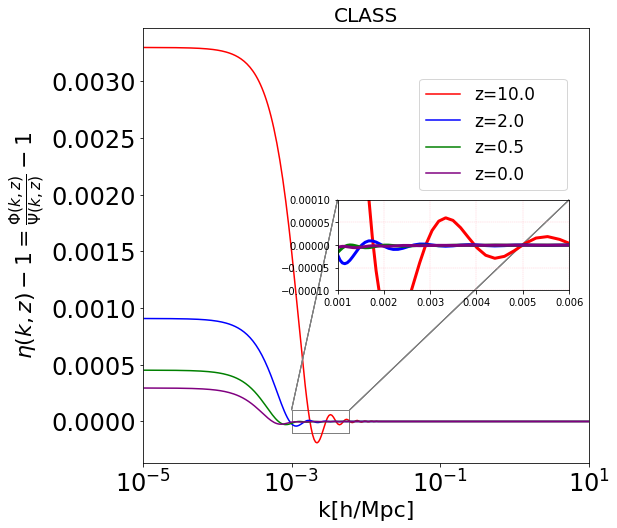

In [133]:

fig, axs = plt.subplots(1,1,figsize=(8,8), sharex=True)
plt.subplots_adjust(hspace=0)
# axs[0] = plt.gca()
k_min=4
axs.tick_params(axis = 'both', which = 'major', labelsize = 24)
axs.tick_params(axis = 'both', which = 'minor', labelsize = 18)
axins = zoomed_inset_axes(axs, 4.0,loc=5,borderpad=2) # zoom-factor: 2.5, location: upper-left
# axins2 = zoomed_inset_axes(axs[0], 6.0,loc=2,borderpad=27) # zoom-factor: 2.5, location: upper-left
variance_large=1
variance_mid=4
kmax_skip_l=3
kmax_skip_m=4
l=0
for i in [3,8,14,30]:



    axs.semilogx(Class_all[i][:,0], eta_CLASS[i][:]-1,
                  "-",color=ColorsI[l],lw=1.5, label=r"z="+str(zlist[i]) )  
    axins.plot(Class_all[i][:,0], eta_CLASS[i][:]-1,"-",color=ColorsI[l],lw=3.0 )  

# #     axins.plot(Gev_lin_phi_zall[i+zrange][variance_mid:kmax_num_m,0], eta_cs7[i+zrange][variance_mid:kmax_num_m,1]-1,
#                   "-",color=ColorsI[l],lw=3.0 )  
#     axins2.plot(Gev_lin_phi_zall[i][variance_large:kmax_num_l,0], eta_cs7[i][variance_large:kmax_num_l,1]-1,
#                   "-",color=ColorsI[l],lw=3.0, label=r"z="+str(zlist[i]) )  

    l=l+1
    #     plt.plot(Gev_lin_phi_zall[i+zrange*2][:,0], mu_kev_mid[i],color="green",linestyle='solid',lw=2.5,  label=r"k-evolution, z="+str(z_list[i]))
#     plt.plot(Gev_lin_phi_zall[i+22][:,0], mu_class_mid[i],color="brown",linestyle='dashed',lw=2.5,  label=r"class, z="+str(z_list[i]))
#     plt.axhline(1. + ((Omega_kessence/Omega_m)*(1+w)/(1-3.*w) )* (1./(1.+z_list[i]))**(-3.*w)  )
    mark_inset(axs, axins,loc1=1, loc2=2 ,  fc="none", ec="0.5")
    mark_inset(axs, axins2,loc1=1, loc2=3 ,  fc="none", ec="0.5")

#     l=l+1
#     #     plt.plot(Gev_lin_phi_zall[i+zrange*2][:,0], mu_kev_mid[i],color="green",linestyle='solid',lw=2.5,  label=r"k-evolution, z="+str(z_list[i]))
# #     plt.plot(Gev_lin_phi_zall[i+22][:,0], mu_class_mid[i],color="brown",linestyle='dashed',lw=2.5,  label=r"class, z="+str(z_list[i]))
# #     plt.axhline(1. + ((Omega_kessence/Omega_m)*(1+w)/(1-3.*w) )* (1./(1.+z_list[i]))**(-3.*w)  )

x1, x2, y1, y2 = 1.e-3,6.e-3, -1.e-4,1.e-4 # specify the limits
axins.set_xlim(x1, x2) # apply the x-limits
axins.set_ylim(y1, y2) # apply the y-limits
# x1, x2, y1, y2 = 0.02,0.03, -39.e-6,-33.e-6 # specify the limits
# axins2.set_xlim(x1, x2) # apply the x-limits
# axins2.set_ylim(y1, y2) # apply the y-limits


# axs.tick_params(axis = 'both', which = 'major', labelsize = 24, labelcolor="black")
axs.legend(bbox_to_anchor=(0.62, 0.78, 0.33, .102), loc=1,ncol=1,fontsize=17, mode="expand", borderaxespad=0.)
axs.set_xlabel("k[h/Mpc]",fontsize=22)
# axs.set_yticks(np.arange(1-4.e-6,1-1.e-4,1.e-7))
# axs.set_ylim(1-1.e-6,1-1.e-4)
# axs.set_ylim(4.e-6,1.e-4)
axs.set_xscale('log')
# axs.set_yscale('log')

axs.set_ylabel(r"${\eta(k,z)}-1 = \frac{\Phi(k,z)}{\Psi(k,z)}-1$",fontsize=22)
# axs.set_ylim(-0.0001,0)
axs.set_xlim(0.00001,10)

# plt.title( r"$c_s^2 =10^{-7}$",fontsize=20)

# plt.savefig('eta_2.jpg', format='jpg',dpi=400, bbox_inches='tight' )
k_min=4
# axs[1].tick_params(axis = 'both', which = 'major', labelsize = 24)
# axs[1].tick_params(axis = 'both', which = 'minor', labelsize = 18)
# # axins = zoomed_inset_axes(ax, 6.0,loc=9,borderpad=4) # zoom-factor: 2.5, location: upper-left
plt.grid(color='pink', linestyle='dashed', linewidth=0.4)
axs.set_title("CLASS",fontsize=20)

plt.savefig('eta_class.pdf', format='pdf',dpi=300, bbox_inches='tight' )
plt.show()





NameError: name 'Gev_lin_phi_zall_cs4' is not defined

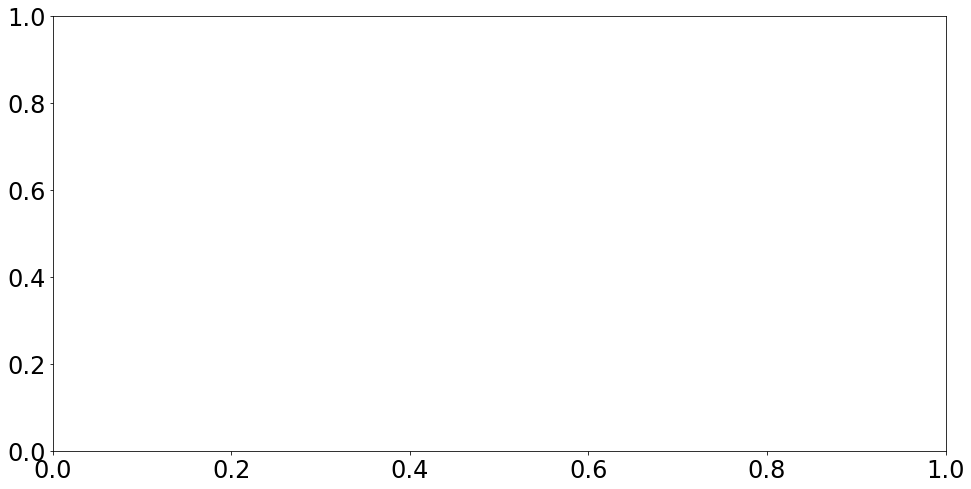

In [12]:

fig, axs = plt.subplots(1,1,figsize=(16,8))
# plt.subplots_adjust(hspace=0)
# axs[0] = plt.gca()
k_min=4
axs.tick_params(axis = 'both', which = 'major', labelsize = 24)
axs.tick_params(axis = 'both', which = 'minor', labelsize = 18)
# axins = zoomed_inset_axes(axs[0], 18.0,loc=4,borderpad=12) # zoom-factor: 2.5, location: upper-left
# axins2 = zoomed_inset_axes(axs[0], 6.0,loc=2,borderpad=27) # zoom-factor: 2.5, location: upper-left
kmax_skip_s=1
l=0
for i in [3,8,14,30]:

    if i==3:
        variance_large=1
        variance_mid=4
        kmax_skip_l=3
        kmax_skip_m=4
        kmax_num_l=np.int(1024/kmax_skip_l)
        kmax_num_m=np.int(1024/kmax_skip_m)
        kmax_num_s=np.int(1024/kmax_skip_s)
        kmax_num_s = np.int(1024/kmax_skip_s)

    if i==8:
        variance_large=1
        variance_mid=8
        kmax_skip_l=15
        kmax_skip_m=4
        kmax_num_l=np.int(1024/kmax_skip_l)
        kmax_num_m=np.int(1024/kmax_skip_m)
        kmax_num_s = np.int(1024/kmax_skip_s)
    if i==14:
        variance_large=1
        variance_mid=10
        kmax_skip_l=8
        kmax_skip_m=4
        kmax_num_l=np.int(1024/kmax_skip_l)
        kmax_num_m=np.int(1024/kmax_skip_m)
        kmax_num_s = np.int(1024/kmax_skip_s)

    if i==30:
        variance_large=1
        variance_mid=14
        kmax_skip_l=7
        kmax_skip_m=4
        kmax_num_l=np.int(1024/kmax_skip_l)
        kmax_num_m=np.int(1024/kmax_skip_m)
        kmax_num_s = np.int(1024/kmax_skip_s)

#     axs[0].plot(Gev_lin_phi_zall_cs4[i+zrange][variance_mid:kmax_num_m,0], eta_cs4[i+zrange][variance_mid:kmax_num_m,1]-1,
    axs.loglog(Gev_lin_phi_zall_cs4[i][:kmax_skip_l,0], Gev_lin_chi_cs4[i][:kmax_skip_l,1]/(2.*Gev_lin_phi_zall_cs4[i][:kmax_skip_l,1]),
                  ".",color=ColorsI[l],lw=3.0)
    axs.loglog(Gev_lin_phi_zall_cs4[i+zrange][:kmax_num_m,0], Gev_lin_chi_cs4[i+zrange][:kmax_num_m,1]/(2.*Gev_lin_phi_zall_cs4[i+zrange][:kmax_num_m,1]),
                  ".",color=ColorsI[l],lw=3.0, label=r"z="+str(zlist[i]) )   

#                   ".",color=ColorsI[l],lw=3.0 )  
#     axs[0].plot(Gev_lin_phi_zall_cs4[i][variance_large:kmax_num_l,0], eta_cs4[i][variance_large:kmax_num_l,1]-1,
#                   "-.",color=ColorsI[l],lw=3.0)
    l=l+1
axs.tick_params(axis = 'both', which = 'major', labelsize = 24, labelcolor="black")
axs.legend(bbox_to_anchor=(0.02, 0.78, 0.13, .102), loc=1,ncol=1,fontsize=14, mode="expand", borderaxespad=0.)
axs.set_xlabel("k[h/Mpc]",fontsize=18)
# axs.set_yticks(np.arange(1-4.e-6,1-1.e-4,1.e-7))
# axs[0].set_ylim(-1.e-6,1.e-6)
# axs.set_ylim(4.e-6,1.e-4)
axs.set_xscale('log')
# axs.set_yscale('log')

axs.set_ylabel(r"${\chi}/2 \Phi$",fontsize=32)
axs.set_ylim(5.e-13,1.e-8)
# plt.title( r"$c_s^2 =10^{-7}$",fontsize=20)

# plt.savefig('eta_2.jpg', format='jpg',dpi=400, bbox_inches='tight' )





In [280]:
Gev_lin_phi_zall_cs4[i][:10,1]/(2.*Gev_lin_phi_zall_cs4[i][:10,1])

array([ 0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5])

In [ ]:
#TEST

In [16]:

fig, axs = plt.subplots(2,1,figsize=(16,16), sharex=True)
plt.subplots_adjust(hspace=0)
# axs[0] = plt.gca()
k_min=4
axs[0].tick_params(axis = 'both', which = 'major', labelsize = 24)
axs[0].tick_params(axis = 'both', which = 'minor', labelsize = 18)
axins = zoomed_inset_axes(axs[0], 18.0,loc=4,borderpad=12) # zoom-factor: 2.5, location: upper-left
axins2 = zoomed_inset_axes(axs[0], 6.0,loc=2,borderpad=27) # zoom-factor: 2.5, location: upper-left

l=0
for i in [3,8,14,30]:

    if i==3:
        variance_large=1
        variance_mid=4
        kmax_skip_l=3
        kmax_skip_m=2
        kmax_num_l=np.int(1024/kmax_skip_l)
        kmax_num_m=np.int(1024/kmax_skip_m)
        kmax_num_s=np.int(1024/kmax_skip_s)
#         kmax_num_s = np.int(1024/kmax_skip_s)

    if i==8:
        variance_large=1
        variance_mid=8
        kmax_skip_l=15
        kmax_skip_m=2
        kmax_num_l=np.int(1024/kmax_skip_l)
        kmax_num_m=np.int(1024/kmax_skip_m)
        kmax_num_s = np.int(1024/kmax_skip_s)
    if i==14:
        variance_large=1
        variance_mid=10
        kmax_skip_l=8
        kmax_skip_m=2
        kmax_num_l=np.int(1024/kmax_skip_l)
        kmax_num_m=np.int(1024/kmax_skip_m)
        kmax_num_s = np.int(1024/kmax_skip_s)

    if i==30:
        variance_large=1
        variance_mid=14
        kmax_skip_l=7
        kmax_skip_m=2
        kmax_num_l=np.int(1024/kmax_skip_l)
        kmax_num_m=np.int(1024/kmax_skip_m)
        kmax_num_s = np.int(1024/kmax_skip_s)

    axs[0].plot(Gev_lin_phi_zall_cs4[i][variance_large:kmax_num_l,0], eta_cs4[i][variance_large:kmax_num_l,1]-1,
                  ".",color=ColorsI[l],lw=3.0)
    axs[0].plot(Class_all[i][:,8], eta_CLASS[:], ".",color=ColorsI[l+1],lw=3.0 )  
#     axs[0].plot(Gev_lin_phi_zall_cs4[i][variance_large:kmax_num_l,0], eta_cs4[i][variance_large:kmax_num_l,1]-1,
#                   "-.",color=ColorsI[l],lw=3.0)
    axins.plot(Gev_lin_phi_zall_cs4[i+zrange][variance_mid:kmax_num_m,0], eta_cs4[i+zrange][variance_mid:kmax_num_m,1]-1,
                  ".",color=ColorsI[l],lw=3.0 )  
    axins2.plot(Gev_lin_phi_zall_cs4[i][variance_large:kmax_num_l,0], eta_cs4[i][variance_large:kmax_num_l,1]-1,
                  ".",color=ColorsI[l],lw=3.0)
#     axs.plot(Gev_lin_phi_zall_cs4[i+zrange*2][variance_small:kmax_num_s,0], eta_cs4[i+zrange*2][variance_small:kmax_num_s,1]-1,
#                   "-",color=ColorsI[l],lw=3.0 )  
    
    axs[0].plot(Gev_lin_phi_zall_cs4[i][variance_large:kmax_num_l,0], eta_cs7[i][variance_large:kmax_num_l,1]-1,
                  "-",color=ColorsI[l],lw=3.0, label=r"z="+str(zlist[i]) )  
    axs[0].plot(Gev_lin_phi_zall_cs4[i+zrange][variance_mid:kmax_num_m,0], eta_cs7[i+zrange][variance_mid:kmax_num_m,1]-1,
                  "-",color=ColorsI[l],lw=3.0 )
    axins.plot(Gev_lin_phi_zall_cs4[i+zrange][variance_mid:kmax_num_m,0], eta_cs7[i+zrange][variance_mid:kmax_num_m,1]-1,
                  "-",color=ColorsI[l],lw=3.0 )  
    axins2.plot(Gev_lin_phi_zall_cs4[i][variance_large:kmax_num_l,0], eta_cs7[i][variance_large:kmax_num_l,1]-1,
                  "-",color=ColorsI[l],lw=3.0, label=r"z="+str(zlist[i]) )  
    axs[0].plot(Gev_lin_phi_zall_cs4[i][variance_large:kmax_num_l,0], eta_cs7[i][variance_large:kmax_num_l,1]-1,
                  "-",color=ColorsI[l],lw=3.0, label=r"z="+str(zlist[i]) )  
    
#     eta_CLASS
#     axs.plot(Gev_lin_phi_zall_cs4[i+zrange*2][variance_small:kmax_num_s,0], eta_cs7[i+zrange*2][variance_small:kmax_num_s,1]-1,
#                   "-",color=ColorsI[l],lw=3.0 )  
#     axins.plot(x, (mu_kev_Hubble[i][variance_large:kmax_num_l]-(tanhyp(x,alpha, beta, gamma)+1))/(mu_kev_Hubble[i][variance_large:kmax_num_l]),".",lw=2.5,color=ColorsI[l],label=r" z="+str(z_list[i]))
    mark_inset(axs[0], axins,loc1=1, loc2=2 ,  fc="none", ec="0.5")
    mark_inset(axs[0], axins2,loc1=1, loc2=3 ,  fc="none", ec="0.5")

    l=l+1
    #     plt.plot(Gev_lin_phi_zall[i+zrange*2][:,0], mu_kev_mid[i],color="green",linestyle='solid',lw=2.5,  label=r"k-evolution, z="+str(z_list[i]))
#     plt.plot(Gev_lin_phi_zall[i+22][:,0], mu_class_mid[i],color="brown",linestyle='dashed',lw=2.5,  label=r"class, z="+str(z_list[i]))
#     plt.axhline(1. + ((Omega_kessence/Omega_m)*(1+w)/(1-3.*w) )* (1./(1.+z_list[i]))**(-3.*w)  )

x1, x2, y1, y2 = 1.2,1.3, -13.e-6,-12.e-6 # specify the limits
axins.set_xlim(x1, x2) # apply the x-limits
axins.set_ylim(y1, y2) # apply the y-limits
x1, x2, y1, y2 = 0.02,0.03, -39.e-6,-33.e-6 # specify the limits
axins2.set_xlim(x1, x2) # apply the x-limits
axins2.set_ylim(y1, y2) # apply the y-limits

axs[0].tick_params(axis = 'both', which = 'major', labelsize = 24, labelcolor="black")
axs[0].legend(bbox_to_anchor=(0.02, 0.78, 0.13, .102), loc=1,ncol=1,fontsize=14, mode="expand", borderaxespad=0.)
axs[0].set_xlabel("k[h/Mpc]",fontsize=18)
# axs.set_yticks(np.arange(1-4.e-6,1-1.e-4,1.e-7))
# axs.set_ylim(1-1.e-6,1-1.e-4)
# axs.set_ylim(4.e-6,1.e-4)
axs[0].set_xscale('log')
# axs.set_yscale('log')

axs[0].set_ylabel(r"${\eta(k,z)}-1 = \frac{\Phi(k,z)}{\Psi(k,z)}-1$",fontsize=32)
# axs.set_ylim(-0.0001,0)
# plt.title( r"$c_s^2 =10^{-7}$",fontsize=20)

# plt.savefig('eta_2.jpg', format='jpg',dpi=400, bbox_inches='tight' )

plt.show()





NameError: name 'kmax_skip_s' is not defined

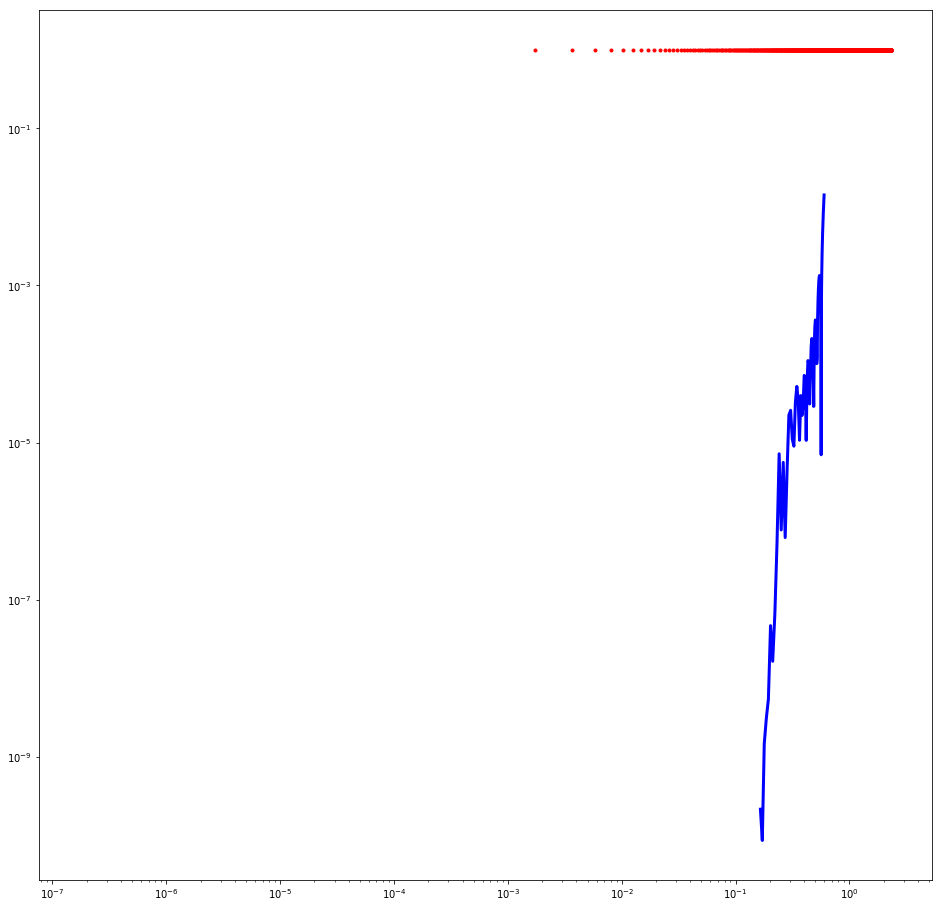

In [33]:
i=1
fig = plt.subplots(1,1,figsize=(16,16), sharex=True)
plt.loglog(Gev_lin_phi_zall_cs4[i][:,0], np.abs(eta_cs4[i][:,1]),".",color=ColorsI[l],lw=3.0)
plt.loglog(Class_all[i][:,8], np.abs(eta_CLASS[i][:]-1),"-",color=ColorsI[l+1],lw=3.0)

In [10]:

fig, axs = plt.subplots(2,1,figsize=(16,16), sharex=True)
plt.subplots_adjust(hspace=0)
# axs[0] = plt.gca()
k_min=4
axs[0].tick_params(axis = 'both', which = 'major', labelsize = 24)
axs[0].tick_params(axis = 'both', which = 'minor', labelsize = 18)
axins = zoomed_inset_axes(axs[0], 18.0,loc=4,borderpad=12) # zoom-factor: 2.5, location: upper-left
axins2 = zoomed_inset_axes(axs[0], 6.0,loc=2,borderpad=27) # zoom-factor: 2.5, location: upper-left
variance_large=1
variance_mid=4
kmax_skip_l=3
kmax_skip_m=4
l=0
for i in [3,8,14,30]:

    if i==3:
        variance_large=1
        variance_mid=4
        kmax_skip_l=3
        kmax_skip_m=2
        kmax_num_l=np.int(1024/kmax_skip_l)
        kmax_num_m=np.int(1024/kmax_skip_m)
        kmax_num_s=np.int(1024/kmax_skip_s)
        kmax_num_s = np.int(1024/kmax_skip_s)

    if i==8:
        variance_large=1
        variance_mid=8
        kmax_skip_l=15
        kmax_skip_m=2
        kmax_num_l=np.int(1024/kmax_skip_l)
        kmax_num_m=np.int(1024/kmax_skip_m)
        kmax_num_s = np.int(1024/kmax_skip_s)
    if i==14:
        variance_large=1
        variance_mid=10
        kmax_skip_l=8
        kmax_skip_m=2
        kmax_num_l=np.int(1024/kmax_skip_l)
        kmax_num_m=np.int(1024/kmax_skip_m)
        kmax_num_s = np.int(1024/kmax_skip_s)

    if i==30:
        variance_large=1
        variance_mid=14
        kmax_skip_l=7
        kmax_skip_m=2
        kmax_num_l=np.int(1024/kmax_skip_l)
        kmax_num_m=np.int(1024/kmax_skip_m)
        kmax_num_s = np.int(1024/kmax_skip_s)

#     axs[0].plot(Gev_lin_phi_zall_cs4[i][variance_large:kmax_num_l,0], eta_cs4[i][variance_large:kmax_num_l,1]-1,
#                   ".",color=ColorsI[l],lw=3.0)
#     axs[0].plot(Gev_lin_phi_zall_cs4[i+zrange][variance_mid:kmax_num_m,0], eta_cs4[i+zrange][variance_mid:kmax_num_m,1]-1,
#                   ".",color=ColorsI[l],lw=3.0 )  
# #     axs[0].plot(Gev_lin_phi_zall_cs4[i][variance_large:kmax_num_l,0], eta_cs4[i][variance_large:kmax_num_l,1]-1,
# #                   "-.",color=ColorsI[l],lw=3.0)
#     axins.plot(Gev_lin_phi_zall_cs4[i+zrange][variance_mid:kmax_num_m,0], eta_cs4[i+zrange][variance_mid:kmax_num_m,1]-1,
#                   ".",color=ColorsI[l],lw=3.0 )  
#     axins2.plot(Gev_lin_phi_zall_cs4[i][variance_large:kmax_num_l,0], eta_cs4[i][variance_large:kmax_num_l,1]-1,
#                   ".",color=ColorsI[l],lw=3.0)
#     axs.plot(Gev_lin_phi_zall_cs4[i+zrange*2][variance_small:kmax_num_s,0], eta_cs4[i+zrange*2][variance_small:kmax_num_s,1]-1,
#                   "-",color=ColorsI[l],lw=3.0 )  
    
    axs[0].plot(Gev_lin_phi_zall_cs4[i][variance_large:kmax_num_l,0], eta_cs7[i][variance_large:kmax_num_l,1]-1,
                  "-",color=ColorsI[l],lw=3.0, label=r"z="+str(zlist[i]) )  
    axs[0].plot(Gev_lin_phi_zall_cs4[i+zrange][variance_mid:kmax_num_m,0], eta_cs7[i+zrange][variance_mid:kmax_num_m,1]-1,
                  "-",color=ColorsI[l],lw=3.0 )
    axins.plot(Gev_lin_phi_zall_cs4[i+zrange][variance_mid:kmax_num_m,0], eta_cs7[i+zrange][variance_mid:kmax_num_m,1]-1,
                  "-",color=ColorsI[l],lw=3.0 )  
    axins2.plot(Gev_lin_phi_zall_cs4[i][variance_large:kmax_num_l,0], eta_cs7[i][variance_large:kmax_num_l,1]-1,
                  "-",color=ColorsI[l],lw=3.0, label=r"z="+str(zlist[i]) )  

#     axs.plot(Gev_lin_phi_zall_cs4[i+zrange*2][variance_small:kmax_num_s,0], eta_cs7[i+zrange*2][variance_small:kmax_num_s,1]-1,
#                   "-",color=ColorsI[l],lw=3.0 )  
#     axins.plot(x, (mu_kev_Hubble[i][variance_large:kmax_num_l]-(tanhyp(x,alpha, beta, gamma)+1))/(mu_kev_Hubble[i][variance_large:kmax_num_l]),".",lw=2.5,color=ColorsI[l],label=r" z="+str(z_list[i]))
    mark_inset(axs[0], axins,loc1=1, loc2=2 ,  fc="none", ec="0.5")
    mark_inset(axs[0], axins2,loc1=1, loc2=3 ,  fc="none", ec="0.5")

    l=l+1
    #     plt.plot(Gev_lin_phi_zall[i+zrange*2][:,0], mu_kev_mid[i],color="green",linestyle='solid',lw=2.5,  label=r"k-evolution, z="+str(z_list[i]))
#     plt.plot(Gev_lin_phi_zall[i+22][:,0], mu_class_mid[i],color="brown",linestyle='dashed',lw=2.5,  label=r"class, z="+str(z_list[i]))
#     plt.axhline(1. + ((Omega_kessence/Omega_m)*(1+w)/(1-3.*w) )* (1./(1.+z_list[i]))**(-3.*w)  )

x1, x2, y1, y2 = 1.2,1.3, -13.e-6,-12.e-6 # specify the limits
axins.set_xlim(x1, x2) # apply the x-limits
axins.set_ylim(y1, y2) # apply the y-limits
x1, x2, y1, y2 = 0.02,0.03, -39.e-6,-33.e-6 # specify the limits
axins2.set_xlim(x1, x2) # apply the x-limits
axins2.set_ylim(y1, y2) # apply the y-limits

axs[0].tick_params(axis = 'both', which = 'major', labelsize = 24, labelcolor="black")
axs[0].legend(bbox_to_anchor=(0.02, 0.78, 0.13, .102), loc=1,ncol=1,fontsize=14, mode="expand", borderaxespad=0.)
axs[0].set_xlabel("k[h/Mpc]",fontsize=18)
# axs.set_yticks(np.arange(1-4.e-6,1-1.e-4,1.e-7))
# axs.set_ylim(1-1.e-6,1-1.e-4)
# axs.set_ylim(4.e-6,1.e-4)
axs[0].set_xscale('log')
# axs.set_yscale('log')

axs[0].set_ylabel(r"${\eta(k,z)}-1 = \frac{\Phi(k,z)}{\Psi(k,z)}-1$",fontsize=32)
# axs.set_ylim(-0.0001,0)
# plt.title( r"$c_s^2 =10^{-7}$",fontsize=20)

# plt.savefig('eta_2.jpg', format='jpg',dpi=400, bbox_inches='tight' )
k_min=4
axs[1].tick_params(axis = 'both', which = 'major', labelsize = 24)
axs[1].tick_params(axis = 'both', which = 'minor', labelsize = 18)
# axins = zoomed_inset_axes(ax, 6.0,loc=9,borderpad=4) # zoom-factor: 2.5, location: upper-left
l=0
for i in [3,8,14,30]:

    if i==3:
        variance_large=1
        variance_mid=4
        kmax_skip_l=30
        kmax_skip_m=2
        kmax_num_l=np.int(1024/kmax_skip_l)
        kmax_num_m=np.int(1024/kmax_skip_m)
        kmax_num_s=np.int(1024/kmax_skip_s)
        kmax_num_s = np.int(1024/kmax_skip_s)

    if i==8:
        variance_large=1
        variance_mid=8
        kmax_skip_l=15
        kmax_skip_m=2
        kmax_num_l=np.int(1024/kmax_skip_l)
        kmax_num_m=np.int(1024/kmax_skip_m)
        kmax_num_s = np.int(1024/kmax_skip_s)

    if i==30:
        variance_large=1
        variance_mid=24
        kmax_skip_l=6.
        kmax_skip_m=2
        kmax_num_l=np.int(1024/kmax_skip_l)
        kmax_num_m=np.int(1024/kmax_skip_m)
        kmax_num_s = np.int(1024/kmax_skip_s)
        
    if i==14:
        variance_large=1
        variance_mid=35
        kmax_skip_l=4.25
        kmax_skip_m=2
        kmax_num_l=np.int(1024/kmax_skip_l)
        kmax_num_m=np.int(1024/kmax_skip_m)
        kmax_num_s = np.int(1024/kmax_skip_s)

    eta4=eta_cs4[i][variance_large:kmax_num_l,1]
    eta7=eta_cs7[i][variance_large:kmax_num_l,1]
    axs[1].loglog(Gev_lin_phi_zall_cs4[i][variance_large:kmax_num_l,0], np.abs(((eta7-1.)- (eta4-1))/(eta7-1.)),".-",color=ColorsI[l],lw=3.0)
    eta4=eta_cs4[i+zrange][variance_mid:kmax_num_m,1]
    eta7=eta_cs7[i+zrange][variance_mid:kmax_num_m,1]
    axs[1].loglog(Gev_lin_phi_zall_cs4[i+zrange][variance_mid:kmax_num_m,0],np.abs(((eta7-1.)- (eta4-1))/(eta7-1.)),".-",color=ColorsI[l],lw=3.0 , label=r"z="+str(zlist[i]) )   
# #     axs.plot(Gev_lin_phi_zall_cs4[i+zrange*2][variance_small:kmax_num_s,0], eta_cs4[i+zrange*2][variance_small:kmax_num_s,1]-1,
# #                   "-",color=ColorsI[l],lw=3.0 )  
    
#     axs[1].plot(Gev_lin_phi_zall_cs4[i][variance_large:kmax_num_l,0], eta_cs7[i][variance_large:kmax_num_l,1]-1,
#                   "-",color=ColorsI[l],lw=3.0, label=r"z="+str(zlist[i]) )  
#     axs[1].plot(Gev_lin_phi_zall_cs4[i+zrange][variance_mid:kmax_num_m,0], eta_cs7[i+zrange][variance_mid:kmax_num_m,1]-1,
#                   "-",color=ColorsI[l],lw=3.0 )  
#     axs.plot(Gev_lin_phi_zall_cs4[i+zrange*2][variance_small:kmax_num_s,0], eta_cs7[i+zrange*2][variance_small:kmax_num_s,1]-1,
#                   "-",color=ColorsI[l],lw=3.0 )  

    l=l+1    
axs[1].tick_params(axis = 'both', which = 'major', labelsize = 24, labelcolor="black")
axs[1].legend(bbox_to_anchor=(0.52, 0.18, 0.13, .102), loc=1,ncol=1,fontsize=14, mode="expand", borderaxespad=0.)
axs[1].set_xlabel("k[h/Mpc]",fontsize=18)
# axs.set_yticks(np.arange(1-4.e-6,1-1.e-4,1.e-7))
# axs.set_ylim(1-1.e-6,1-1.e-4)
# axs.set_ylim(4.e-6,1.e-4)
axs[1].set_xscale('log')
# axs.set_yscale('log')

axs[1].set_ylabel(r"Rel difference",fontsize=32)
plt.savefig('eta_comparison.jpg', format='jpg',dpi=400, bbox_inches='tight' )

plt.show()





NameError: name 'kmax_skip_s' is not defined